# <center>Data Wrangling</center>

## introduction

In this project, I will apply the skills that i acquired in the course to gather and wrangle real-world data with two datasets of
my choice.
I will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and
structure, and implement a cleaning strategy for the data. I will then store the updated data into mine selected
database/data store, combine the data, and answer a research question with the datasets.
Throughout the process, I are expected to:
1. Explain my decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research
question
2. Write code comments so my code is more readable

## The data Wrangling process will be like :

!['AltText'](images/wrang.png)

### We will walk step by step of **Data Wrangling** technique

*Importing the required libraries for the project*

In [179]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Data visualization
import requests  # HTTP requests
import matplotlib.pyplot as plt  # Plotting
import urllib.request  # Opening URLs
import warnings  # Manage warnings

*For ignoring the unnsereary warninngs*

In [180]:
warnings.filterwarnings("ignore")

## 1. Data Gathering (Both of the datasets)

#### First dataset about a cars taken from API [git hub user content](https://raw.githubusercontent.com) 

In [181]:
url = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/cars.json'
response = urllib.request.urlopen(url)  # Fetch data from URL
data = response.read().decode()  # Decode data to string
car_data1 = pd.read_json(data)  # Load JSON data into DataFrame
car_data1.head(3)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA


### Briefly describtion about the first dataset

This dataset provides information on various car models, including their specifications and origin. Each row represents a unique car model with the following attributes:

* Name: The name of the car model.
* Miles_per_Gallon: The fuel efficiency of the car, measured in miles per gallon (MPG).
* Cylinders: The number of cylinders in the car's engine.
* Displacement: The engine's displacement in cubic inches.
* Horsepower: The engine's power output, measured in horsepower.
* Weight_in_lbs: The weight of the car in pounds.
* Acceleration: The time it takes for the car to accelerate from 0 to 60 mph, measured in seconds.
* Year: The year the car model was manufactured.
* Origin: The country where the car was manufactured (e.g., USA).

#### Secound dataset about a cars taken from xlsx file from kaggle [2009 New Car Information](https://www.kaggle.com/datasets/gagankattula/2009-new-car-information)

In [182]:
car_data2 = pd.read_excel('DataSets/CarDataSets.xlsx') # Read the exist xlsx file
car_data2.head(3)

,Model,Vehicle,Type,Origin,Seats,Drive,Engine,Cylinders,Horsepower,Mileage Overall,...,CrashDriver,CrashPassenger,SideCrashDriver,SideCrashPassenger,Frontal Offset-IIHS,Side-IIHS,Rollover Rating,Price,Category,Unnamed: 43
0,Acura MDX,sport utility,luxury sport utility,Asia,7.0,all,3.7,6.0,305.0,17.0,...,5,5,5,5.0,good,good,good,47000.0,0.0,NaN
1,Acura RDX,sport utility,small sport utility,Asia,5.0,all,2.3,4.0,240.0,18.0,...,5,5,5,5.0,good,good,good,37000.0,0.0,NaN
2,Acura RL,car,luxury car,Asia,5.0,all,3.5,6.0,300.0,18.0,...,5,5,5,5.0,good,good,excellent,53000.0,0.0,NaN


### Briefly describtion about the secound dataset

This dataset provides detailed information on various car models, including specifications, performance metrics, and safety ratings. The dataset consists of 302 entries and 44 columns, with some missing values. Each row represents a unique car model with the following attributes:

* Model: Name of the car model.
* Vehicle: Type of vehicle (e.g., sedan, SUV).
* Type: Vehicle classification (e.g., compact, mid-size).
* Origin: Country where the car was manufactured.
* Seats: Number of seats in the car.
* Drive: Type of drivetrain (e.g., FWD, RWD).
* Engine: Engine size in liters.
* Cylinders: Number of cylinders in the engine.
* Horsepower: Engine power output in horsepower.
* Mileage Overall: Combined fuel efficiency in miles per gallon.
* Mileage Highway: Highway fuel efficiency in miles per gallon.
* Mileage City: City fuel efficiency in miles per gallon.
* Zero-60 (sec): Time taken to accelerate from 0 to 60 mph.
* Braking Dry (ft): Braking distance on dry surfaces in feet.
* Braking Wet (ft): Braking distance on wet surfaces in feet.
* Avoidance Maneuver (mph): Speed during avoidance maneuvers.
* Length: Length of the car in inches.
* Width: Width of the car in inches.
* Height: Height of the car in inches.
* Wheelbase: Distance between the front and rear axles in inches.
* Turning Circle: Diameter of the turning circle in feet.
* Weight: Weight of the car in pounds.
* Max Load: Maximum load capacity in pounds.
* Cargo Volume: Cargo volume in cubic feet.
* Front Shoulder: Front shoulder room in inches.
* Front Leg Room: Front legroom in inches.
* Front Head Room: Front headroom in inches.
* Rear Shoulder: Rear shoulder room in inches.
* Rear Leg Room: Rear legroom in inches.
* Rear Head Room: Rear headroom in inches.
* Reliable: Reliability rating of the car.
* Satisfaction: Owner satisfaction rating.
* Routine Handling: Rating of the car's routine handling.
* Emergency Handling: Rating of the car's emergency handling.
* CrashDriver: Driver safety rating in crash tests.
* CrashPassenger: Passenger safety rating in crash tests.
* SideCrashDriver: Driver safety rating in side crash tests.
* SideCrashPassenger: Passenger safety rating in side crash tests.
* Frontal Offset-IIHS: Frontal offset crash rating by IIHS.
* Side-IIHS: Side crash rating by IIHS.
* Rollover Rating: Rollover safety rating.
* Price: Price of the car in dollars.
* Category: Category rating of the car.
* Unnamed: 43: An extra column with mostly null values.

#### After gathering the data we most save it as csv after cleaning and combining the data :

In [183]:
car_data1.to_csv('DataSets/CarData1.csv', index=False) # Save the uncleand dataset1
car_data2.to_csv('DataSets/CarData2.csv', index=False) # Save the uncleand dataset2

## 2. Assess the data

#### Now we most assessing the datasets to know how to handle the data and clean it to be a tidy data

#### Checking the data types 

In [184]:
car_data1.info() # See the data types and number of data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              406 non-null    object 
 1   Miles_per_Gallon  398 non-null    float64
 2   Cylinders         406 non-null    int64  
 3   Displacement      406 non-null    float64
 4   Horsepower        400 non-null    float64
 5   Weight_in_lbs     406 non-null    int64  
 6   Acceleration      406 non-null    float64
 7   Year              406 non-null    object 
 8   Origin            406 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


#### Check if there is null values

In [185]:
car_data1.isna().sum() # See the number of nulls

Name                0
Miles_per_Gallon    8
Cylinders           0
Displacement        0
Horsepower          6
Weight_in_lbs       0
Acceleration        0
Year                0
Origin              0
dtype: int64

#### Check if there is duplicated observation

In [186]:
car_data1.duplicated().sum()

0

#### See description of the dataset1

In [187]:
car_data1.describe() # See a describtion of the data before cleaning 

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


#### Checking the data types

In [188]:
car_data2.info() # See the data types and number of data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Model                     299 non-null    object 
 1   Vehicle                   299 non-null    object 
 2   Type                      299 non-null    object 
 3   Origin                    299 non-null    object 
 4   Seats                     299 non-null    float64
 5   Drive                     299 non-null    object 
 6   Engine                    299 non-null    float64
 7   Cylinders                 299 non-null    float64
 8   Horsepower                299 non-null    float64
 9   Mileage Overall           273 non-null    float64
 10  Mileage Highway           230 non-null    float64
 11  Mileage City              230 non-null    float64
 12  Zero-60 (sec)             272 non-null    float64
 13  Braking Dry (ft)          272 non-null    float64
 14  Braking We

#### Check if there is null values for dataset 2

In [189]:
car_data2.isna().sum() # See the number of nulls

Model                         3
Vehicle                       3
Type                          3
Origin                        3
Seats                         3
Drive                         3
Engine                        3
Cylinders                     3
Horsepower                    3
Mileage Overall              29
Mileage Highway              72
Mileage City                 72
Zero-60 (sec)                30
Braking Dry (ft)             30
Braking Wet (ft)             72
Avoidance Maneuver (mph)     33
Length                        3
Width                         3
Height                        4
Wheelbase                     3
Turning Circle               26
Weight                        6
Max Load                     17
Cargo Volume                 49
Front Shoulder                8
Front Leg Room               24
Front Head Room              23
Rear Shoulder                27
Rear Leg Room                41
Rear Head Room               41
Reliable                     51
Satisfac

#### Check if there is duplicated observation

In [190]:
car_data2.duplicated().sum()

1

#### See description of the dataset2

In [191]:
car_data2.describe() # See a describtion of the data before cleaning 

,Seats,Engine,Cylinders,Horsepower,Mileage Overall,Mileage Highway,Mileage City,Zero-60 (sec),Braking Dry (ft),Braking Wet (ft),...,Cargo Volume,Front Shoulder,Front Leg Room,Front Head Room,Rear Shoulder,Rear Leg Room,Rear Head Room,SideCrashPassenger,Price,Category
count,299.000000,299.000000,299.000000,299.000000,273.000000,230.000000,230.000000,272.000000,272.000000,230.000000,...,253.000000,294.000000,278.000000,279.000000,275.000000,261.000000,261.000000,204.000000,299.000000,299.000000
mean,5.220736,3.383278,5.804682,240.100334,19.886447,27.686957,13.495652,8.444118,137.897059,151.773913,...,25.812253,56.853741,41.088129,3.878136,55.603636,27.998084,3.218391,4.730392,37655.518395,0.043478
std,1.249740,1.140935,1.418683,69.613723,5.090894,5.794690,3.855182,2.090384,8.965518,14.614440,...,15.994956,3.623591,0.899440,1.196302,5.739095,2.341309,1.465700,0.526030,18292.507579,0.204273
min,2.000000,1.000000,1.300000,71.000000,10.000000,14.000000,7.000000,4.200000,112.000000,123.000000,...,2.000000,43.500000,38.000000,1.500000,18.000000,17.000000,0.000000,3.000000,14000.000000,0.000000
25%,5.000000,2.500000,4.000000,200.000000,17.000000,24.000000,11.000000,7.300000,132.750000,142.250000,...,14.000000,54.500000,40.500000,3.000000,53.000000,27.000000,2.000000,5.000000,26000.000000,0.000000
50%,5.000000,3.500000,6.000000,242.000000,19.000000,27.000000,13.000000,8.300000,137.000000,150.500000,...,18.000000,57.000000,41.000000,3.500000,56.000000,28.000000,3.500000,5.000000,33000.000000,0.000000
75%,5.500000,3.800000,6.000000,275.000000,22.000000,31.000000,15.000000,9.225000,143.000000,158.000000,...,37.500000,58.500000,41.500000,4.500000,58.000000,29.500000,4.000000,5.000000,42000.000000,0.000000
max,9.000000,8.300000,10.000000,510.000000,51.000000,47.000000,34.000000,31.000000,161.000000,215.000000,...,75.500000,67.000000,44.000000,8.000000,67.000000,35.000000,8.500000,5.000000,135000.000000,1.000000


### 1. First dataset from API is :

In [192]:
car_data1.head(1) # Just take a look of the nature of data we have

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA


#### And the columns is have is :

In [193]:
car_data1.columns # See the columns names

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

#### The shape of car_data1 dataframe is

In [194]:
car_data1.shape # take a look of the shape

(406, 9)

#### The dataset one is not tidy data, it's messy and dirty data **(The first dataset)**

1. **Dirty**: Missing values, duplicated values.
2. **Messy**: Irrelevant columns and structure issues not suitable for concatenation.

### 2. Secound dataset from xlsx in kaggle :

In [195]:
car_data2.head(1) # Just take a look of the nature of data we have

,Model,Vehicle,Type,Origin,Seats,Drive,Engine,Cylinders,Horsepower,Mileage Overall,...,CrashDriver,CrashPassenger,SideCrashDriver,SideCrashPassenger,Frontal Offset-IIHS,Side-IIHS,Rollover Rating,Price,Category,Unnamed: 43
0,Acura MDX,sport utility,luxury sport utility,Asia,7.0,all,3.7,6.0,305.0,17.0,...,5,5,5,5.0,good,good,good,47000.0,0.0,NaN


#### And the columns is have is :

In [196]:
car_data2.columns # See the columns names

Index(['Model', 'Vehicle', 'Type', 'Origin', 'Seats', 'Drive', 'Engine',
       'Cylinders', 'Horsepower', 'Mileage Overall', 'Mileage Highway',
       'Mileage City', 'Zero-60 (sec)', 'Braking Dry (ft)', 'Braking Wet (ft)',
       'Avoidance Maneuver (mph)', 'Length', 'Width', 'Height', 'Wheelbase',
       'Turning Circle', 'Weight', 'Max Load', 'Cargo Volume',
       'Front Shoulder', 'Front Leg Room', 'Front Head Room', 'Rear Shoulder',
       'Rear Leg Room', 'Rear Head Room', 'Reliable', 'Satisfaction',
       'Routine Handling', 'Emergency Handling', 'CrashDriver',
       'CrashPassenger', 'SideCrashDriver', 'SideCrashPassenger',
       'Frontal Offset-IIHS', 'Side-IIHS', 'Rollover Rating', 'Price',
       'Category', 'Unnamed: 43'],
      dtype='object')

#### The shape of car_data2 dataframe is

In [197]:
car_data2.shape # take a look of the shape

(302, 44)

#### The dataset two is not tidy data, it's messy and dirty data **(The second dataset)**

1. **Dirty**: Missing values, duplicated values.
2. **Messy**: Irrelevant columns and structure issues not suitable for concatenation.

### We can notice the huge differance of the data so we most make it in the same form to combine it togather

## 3. Clean the data

### First thing i will clean dataset1

#### Drop all the columns we dont need from dataset 1

In [198]:
car_data1 = car_data1[['Name','Origin','Cylinders','Horsepower']] # Drop the columns that we dont need in our analysis
car_data1.head(1)

,Name,Origin,Cylinders,Horsepower
0,chevrolet chevelle malibu,USA,8,130.0


#### Then check the data types if it need casting 

In [199]:
car_data1.info() # See the data types and number of data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        406 non-null    object 
 1   Origin      406 non-null    object 
 2   Cylinders   406 non-null    int64  
 3   Horsepower  400 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.8+ KB


#### See the observations how contains null values

In [200]:
car_data1[car_data1['Horsepower'].isna()] # See the observation that have NaN values to know how to deal with it

,Name,Origin,Cylinders,Horsepower
38,ford pinto,USA,4,NaN
133,ford maverick,USA,6,NaN
337,renault lecar deluxe,Europe,4,NaN
343,ford mustang cobra,USA,4,NaN
361,renault 18i,Europe,4,NaN
382,amc concord dl,USA,4,NaN


#### We can handling the null values is Horsepower column

In [201]:
car_data1['Horsepower'].fillna(car_data1['Horsepower'].median(), inplace=True) # Claculate the median of Horsepower and but it into the nan values

#### I will cast thouse two columns (Cylinders,Horsepower) to smaller size to reduce the memory usage

In [202]:
car_data1['Cylinders'] = car_data1['Cylinders'].astype('int16') # Cast the Cylinders to int16 it dont need int64 it too small on it 
car_data1['Horsepower'] = car_data1['Horsepower'].replace('NaN', 0).astype('int16')# Cast the Horsepower to int16 it dont need float64 it too small on it and replace the NaN values with 0 

#### Check the duplicated drop if exiest

In [203]:
car_data1 = car_data1.drop_duplicates() # Drop the duplicated observation

### Secound thing i will clean dataset2

#### Drop all the columns we dont need from dataset 2

In [204]:
car_data2 = car_data2[['Model','Origin','Cylinders','Horsepower']] # Drop the columns that we dont need in our analysis
car_data2.head(1)

,Model,Origin,Cylinders,Horsepower
0,Acura MDX,Asia,6.0,305.0


#### rename the columns to be like the other data set 

In [205]:
car_data2 = car_data2.rename(columns={'Model': 'Name'}) # Rename the column to make it the same on each data sets to concate it

#### Then check the data types if it need casting 

In [206]:
car_data2.info() # See the data types and number of data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        299 non-null    object 
 1   Origin      299 non-null    object 
 2   Cylinders   299 non-null    float64
 3   Horsepower  299 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.6+ KB


#### Cheack null values and handle it 

In [207]:
car_data2 = car_data2.dropna(how = 'all') # Drop if there is observation that all NaN values

#### I will cast thouse two columns (Cylinders,Horsepower) to smaller size to reduce the memory usage

In [208]:
car_data2['Cylinders'] = car_data2['Cylinders'].astype('int16') # Cast the Cylinders to int16 it dont need int64 it too small on it 
car_data2['Horsepower'] = car_data2['Horsepower'].astype('int16') # Cast the Horsepower to int16 it dont need float64 it too small 

#### Check the duplicated drop if exiest

In [209]:
car_data2 = car_data2.drop_duplicates() # Drop the duplicated observation

#### Store the data after cleaning separatly

In [210]:
car_data1.to_csv('DataSets/CarData1Cleand.csv', index=False) # Save the data sets after cleaning
car_data2.to_csv('DataSets/CarData2Cleand.csv', index=False) # Save the data sets after cleaning

## 4. Combine the two datasets

#### *Combine the two datasets using concat*

In [211]:
combined_data = pd.concat([car_data1, car_data2], ignore_index=True) # Concate the datasets
combined_data.sample(5)

,Name,Origin,Cylinders,Horsepower
633,Subaru Outback,Asia,6,250
276,ford ltd landau,USA,8,129
415,Chevrolet Avalanche,USA,8,310
538,Lincoln LS,USA,6,232
601,Pontiac G8,USA,6,361


#### See a bref describtion about the concated dataframes 

In [212]:
combined_data.describe() # See a describtion about the numaric data in the combines datasets

,Cylinders,Horsepower
count,680.000000,680.000000
mean,5.620588,164.541176
std,1.605455,86.405207
min,1.000000,46.000000
25%,4.000000,90.000000
50%,6.000000,148.000000
75%,6.000000,232.750000
max,10.000000,510.000000


#### Check if it have null vales and the data types

In [213]:
combined_data.isna().sum() # See the number of nulls

Name          0
Origin        0
Cylinders     0
Horsepower    0
dtype: int64

In [214]:
combined_data.info() # See the data types and number of data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        680 non-null    object
 1   Origin      680 non-null    object
 2   Cylinders   680 non-null    int16 
 3   Horsepower  680 non-null    int16 
dtypes: int16(2), object(2)
memory usage: 13.4+ KB


* #### The shape of the data frame is 

In [215]:
combined_data.shape # See the shape of data and the number of observation and number of columns

(680, 4)

#### Now it tidy dataset i removed all unnecessary columns ,drop the duplicated observation and filled the missing data points and maked it clean data and ready to store

## 5. Store data

#### After we make sure that the data is cleand and comined we want to store it

In [216]:
combined_data.to_csv('DataSets/combined_data.csv', index=False) # Save the data after concated it

## 6. Answer an intersting questions with visuals

* ### How the distribution of numaric data ?

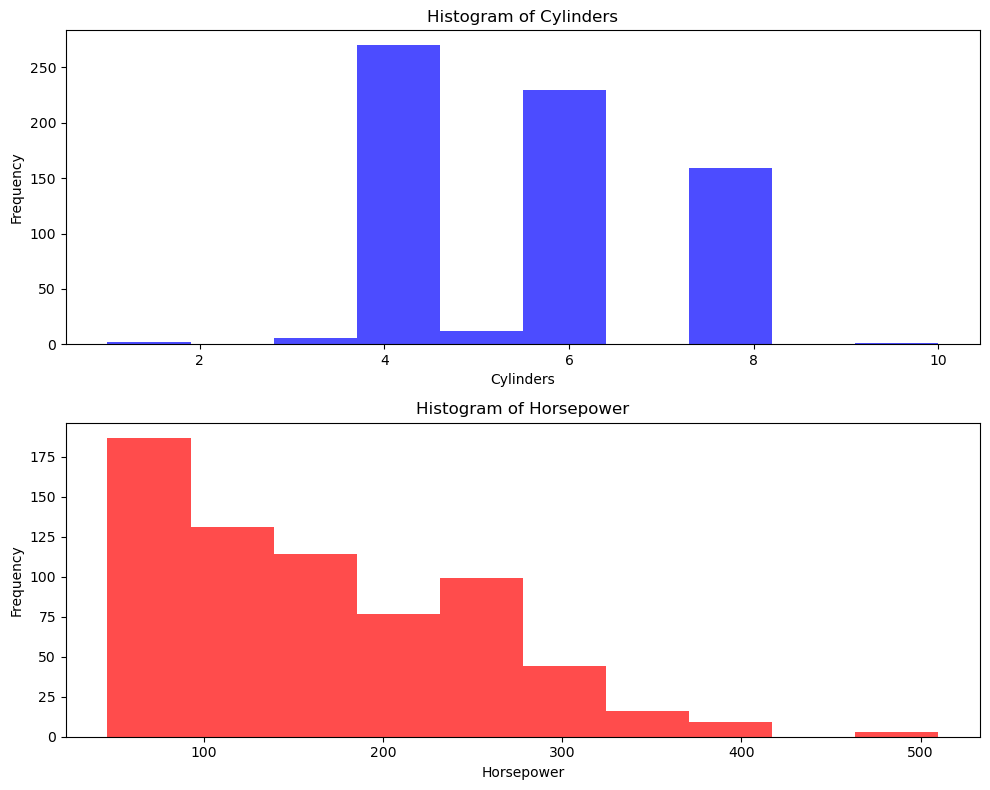

In [217]:
# Plotting histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Histogram for combined_data with Cylinders
ax1.hist(combined_data['Cylinders'], bins=10, alpha=0.7, color='blue')
ax1.set_title('Histogram of Cylinders')
ax1.set_xlabel('Cylinders')
ax1.set_ylabel('Frequency')

# Histogram for combined_data with Horsepower
ax2.hist(combined_data['Horsepower'], bins=10, alpha=0.7, color='red')
ax2.set_title('Histogram of Horsepower')
ax2.set_xlabel('Horsepower')
ax2.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

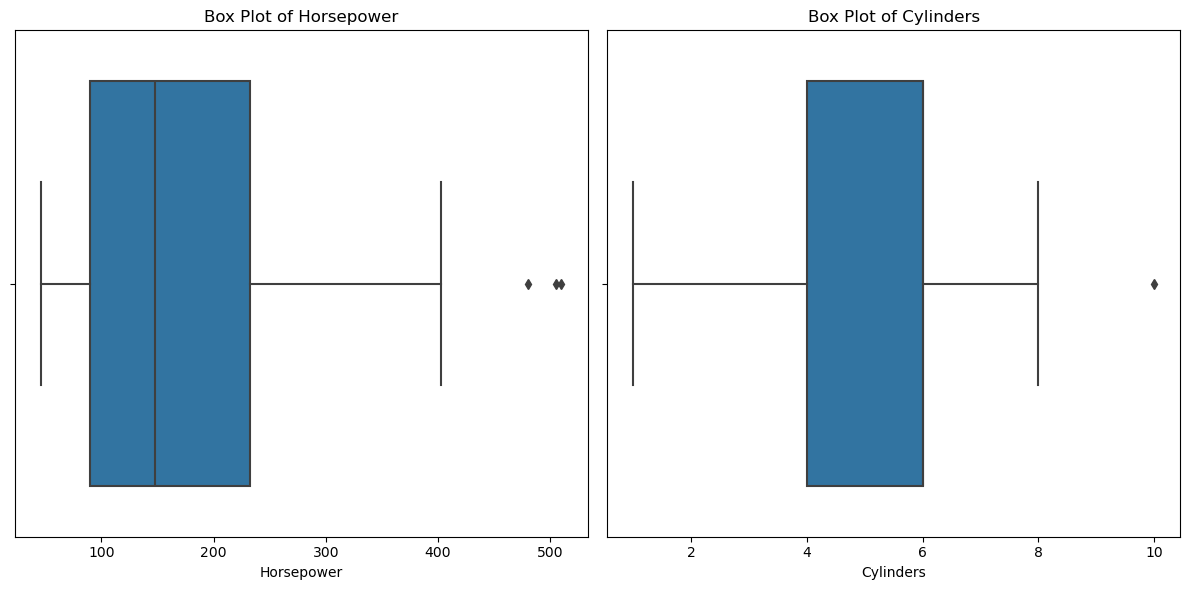

In [218]:
# Create box plots for selected columns
plt.figure(figsize=(12, 6))

# Box plot for 'Horsepower'
plt.subplot(1, 2, 1)
sns.boxplot(x=combined_data['Horsepower'])
plt.title('Box Plot of Horsepower')

# Box plot for 'Cylinders'
plt.subplot(1, 2, 2)
sns.boxplot(x=combined_data['Cylinders'])
plt.title('Box Plot of Cylinders')

plt.tight_layout()
plt.show()

### Answer : the data of Horsepower squet to the rigth and there is an outliers in 500 and the data of Cylinders splited between 4 then 6 then 8 and there is outliers is 10

* ### Is there a correlation between the numaric data ?

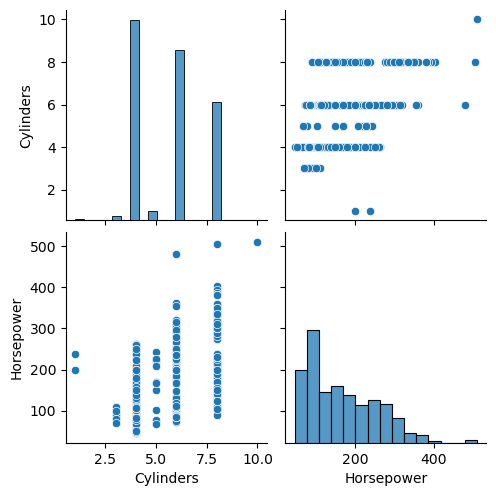

In [219]:
sns.pairplot(combined_data) # Create a pair plot for the numaric fetures
plt.show()

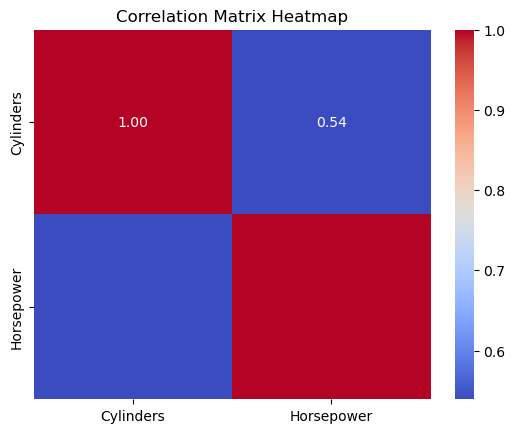

In [220]:
sns.heatmap(combined_data[['Cylinders','Horsepower']].corr(), annot=True, cmap='coolwarm', fmt=".2f") # Draw a heatmap for corr between the numaric fetures
plt.title('Correlation Matrix Heatmap') # Putting a title
plt.show()

### Answer : there is a moderate positive correlation is 0.54 between Horsepower and Cylinders

* ### Distribution of Vehicle across the Origins ?

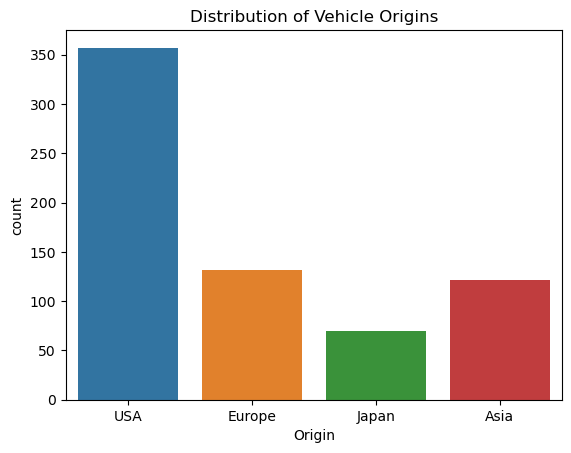

In [221]:
sns.countplot(data=combined_data, x='Origin') # Count plot for Origin of vehicles
plt.title('Distribution of Vehicle Origins') # Title
plt.show()

### Answer : the USA in the top and the secound is Europe then Asia then japan

* ### What is The Average Horsepower by Origin

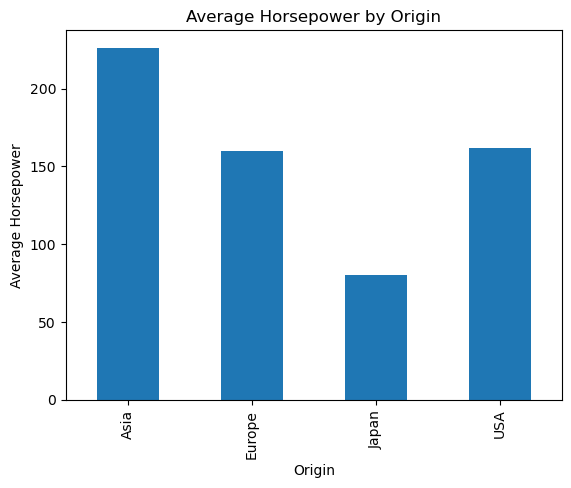

In [222]:
avg_hp_by_origin = combined_data.groupby('Origin')['Horsepower'].mean() # Group be the origin then calculate the mean of Horsepower for each origin
avg_hp_by_origin.plot(kind='bar') # Select a bar plot
plt.title('Average Horsepower by Origin') # Title
plt.ylabel('Average Horsepower') # Y lable
plt.show()

### Answer is the Asia in the top then USA then Europe and then japan

## Overview :

**Wee walked on each step in data wrangling technique step by step :**
1. Gathering
2. Assessing 
3. Cleaning
4. Combining
5. Store the result
6. And answering questions about the cleaned data

**Actully if i had a more time to complete the project :**
1. I will search for another dataset and add it and combine it to the new dataset we have
2. Make an ML modeling to clustring the data
3. Answering more questions about the data and visualize the result